In [1]:
# Begin Lesson 3

In [2]:
# Sıcaklık tahmini yapmak için regresyon kullanılır.
# Evet hayır cevapları için classification kullanılır.
# Zamana bağlı veriye time series denir.

Model Nasıl Oluşturulur

1. Data Set Oluşturulur.
2. Data Temizlenir
3. Datalar dönüştürülür.
4. Model eğitilir.
5. Model optimize edilene kadar eğitilir.
6. Test model oluşturulur.
7. Optimize edilmiş modelle yeni datalar tahmin edilir.
8. Model yayınlanır.
9. Geri dönüşlere göre model güncellenir.

In [3]:
# Code Begin 

# Regression - Geçmiş verilerden geleceği tahmin etme 

Bu derste regression algoritmalarını derinlemesine öğreneceğiz. Araba fiyatlarını tahmin eden bir makine öğrenmesi modeli geliştireceğiz.
Başarı oranını yüzde 85 in üstünde tutmaya çalışacğız.

In [4]:
#pip install xlrd

### Datayı okuma

In [5]:
import pandas as pd # veri dosyasını okuma ve manipüle etme paketi
import sqlite3
import matplotlib.pyplot as plt

In [6]:
conn = sqlite3.connect('cars.db')

In [7]:
df = pd.read_sql_query('select * from cars',conn)

In [8]:
df.head()

Price  Mileage   Make    Model      Trim   Type  Cylinder  Liter  \
0  17314.103129   8221.0  Buick  Century  Sedan 4D  Sedan         6    3.1   
1  17542.036083   9135.0  Buick  Century  Sedan 4D  Sedan         6    3.1   
2  16218.847862  13196.0  Buick  Century  Sedan 4D  Sedan         6    3.1   
3  16336.913140  16342.0  Buick  Century  Sedan 4D  Sedan         6    3.1   
4  16339.170324  19832.0  Buick  Century  Sedan 4D  Sedan         6    3.1   

   Doors Cruise Sound Leather  
0      4      1     1       1  
1      4      1     1       0  
2      4      1     1       0  
3      4      1     0       0  
4      4      1     0       1

In [9]:
conn.close()

In [10]:
df = pd.read_excel('cars.xls')

### EDA - Exporatory Data Analysis - Keşifçi Veri Analizi

In [11]:
df.head() # ilk 5 satır

Price  Mileage   Make    Model      Trim   Type  Cylinder  Liter  \
0  17314.103129     8221  Buick  Century  Sedan 4D  Sedan         6    3.1   
1  17542.036083     9135  Buick  Century  Sedan 4D  Sedan         6    3.1   
2  16218.847862    13196  Buick  Century  Sedan 4D  Sedan         6    3.1   
3  16336.913140    16342  Buick  Century  Sedan 4D  Sedan         6    3.1   
4  16339.170324    19832  Buick  Century  Sedan 4D  Sedan         6    3.1   

   Doors  Cruise  Sound  Leather  
0      4       1      1        1  
1      4       1      1        0  
2      4       1      1        0  
3      4       1      0        0  
4      4       1      0        1

In [12]:
df.tail()  # son 5 satır

Price  Mileage    Make     Model           Trim   Type  Cylinder  \
799  16507.070267    16229  Saturn  L Series  L300 Sedan 4D  Sedan         6   
800  16175.957604    19095  Saturn  L Series  L300 Sedan 4D  Sedan         6   
801  15731.132897    20484  Saturn  L Series  L300 Sedan 4D  Sedan         6   
802  15118.893228    25979  Saturn  L Series  L300 Sedan 4D  Sedan         6   
803  13585.636802    35662  Saturn  L Series  L300 Sedan 4D  Sedan         6   

     Liter  Doors  Cruise  Sound  Leather  
799    3.0      4       1      0        0  
800    3.0      4       1      1        0  
801    3.0      4       1      1        0  
802    3.0      4       1      1        0  
803    3.0      4       1      0        0

In [13]:
df.shape # satır ve sütun sayisi

(804, 12)

In [14]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [15]:
df.isnull().sum() # hangi sutunda kac bos veri var

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [16]:
df.describe() # istatistik verir

Price       Mileage    Cylinder       Liter       Doors  \
count    804.000000    804.000000  804.000000  804.000000  804.000000   
mean   21343.143767  19831.934080    5.268657    3.037313    3.527363   
std     9884.852801   8196.319707    1.387531    1.105562    0.850169   
min     8638.930895    266.000000    4.000000    1.600000    2.000000   
25%    14273.073870  14623.500000    4.000000    2.200000    4.000000   
50%    18024.995019  20913.500000    6.000000    2.800000    4.000000   
75%    26717.316636  25213.000000    6.000000    3.800000    4.000000   
max    70755.466717  50387.000000    8.000000    6.000000    4.000000   

           Cruise       Sound     Leather  
count  804.000000  804.000000  804.000000  
mean     0.752488    0.679104    0.723881  
std      0.431836    0.467111    0.447355  
min      0.000000    0.000000    0.000000  
25%      1.000000    0.000000    0.000000  
50%      1.000000    1.000000    1.000000  
75%      1.000000    1.000000    1.000000  
max      1.000000    1.000000    1.000000

### Korelasyon Hesaplama

In [17]:
df.corr(numeric_only= True)

Price   Mileage  Cylinder     Liter     Doors    Cruise  \
Price     1.000000 -0.143051  0.569086  0.558146 -0.138750  0.430851   
Mileage  -0.143051  1.000000 -0.029461 -0.018641 -0.016944  0.025037   
Cylinder  0.569086 -0.029461  1.000000  0.957897  0.002206  0.354285   
Liter     0.558146 -0.018641  0.957897  1.000000 -0.079259  0.377509   
Doors    -0.138750 -0.016944  0.002206 -0.079259  1.000000 -0.047674   
Cruise    0.430851  0.025037  0.354285  0.377509 -0.047674  1.000000   
Sound    -0.124348 -0.026146 -0.089704 -0.065527 -0.062530 -0.091730   
Leather   0.157197  0.001005  0.075520  0.087332 -0.061969 -0.070573   

             Sound   Leather  
Price    -0.124348  0.157197  
Mileage  -0.026146  0.001005  
Cylinder -0.089704  0.075520  
Liter    -0.065527  0.087332  
Doors    -0.062530 -0.061969  
Cruise   -0.091730 -0.070573  
Sound     1.000000  0.165444  
Leather   0.165444  1.000000

In [18]:
import seaborn as sns

<Axes: >

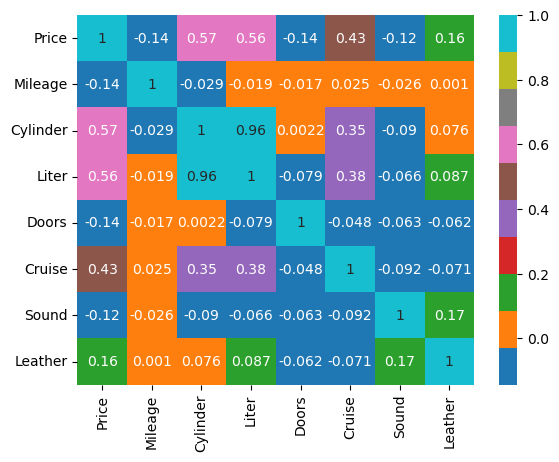

In [19]:
sns.heatmap(df.corr(numeric_only= True),annot = True , cmap= 'tab10' )

In [20]:
df['Make'].unique() # Tekil veriler

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [21]:
df['Make'].value_counts()

Make
Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: count, dtype: int64

In [22]:
df['Make'].value_counts(normalize = True)

Make
Chevrolet    0.398010
Pontiac      0.186567
SAAB         0.141791
Buick        0.099502
Cadillac     0.099502
Saturn       0.074627
Name: proportion, dtype: float64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Buick'),
  Text(1, 0, 'Cadillac'),
  Text(2, 0, 'Chevrolet'),
  Text(3, 0, 'Pontiac'),
  Text(4, 0, 'SAAB'),
  Text(5, 0, 'Saturn')])

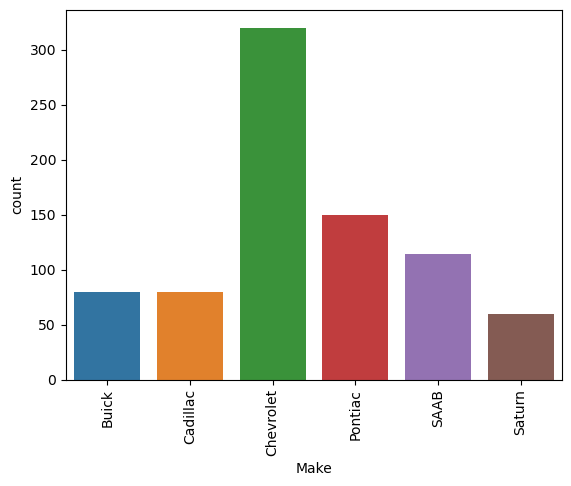

In [23]:
sns.countplot(x = df['Make'] , hue =df['Make'])
plt.xticks(rotation = 90)

<Axes: xlabel='count', ylabel='Make'>

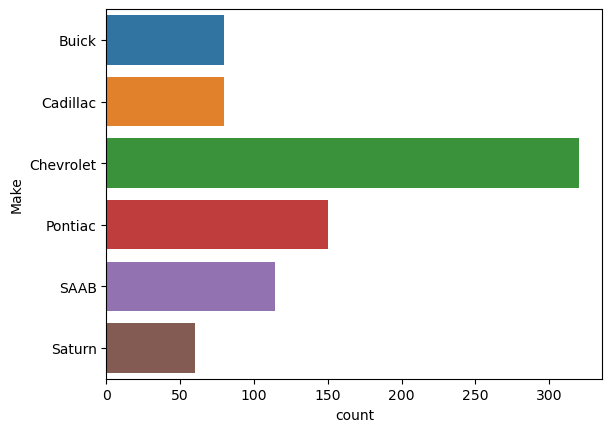

In [24]:
sns.countplot(y = df['Make'] , hue =df['Make'])

<Axes: xlabel='Cylinder', ylabel='count'>

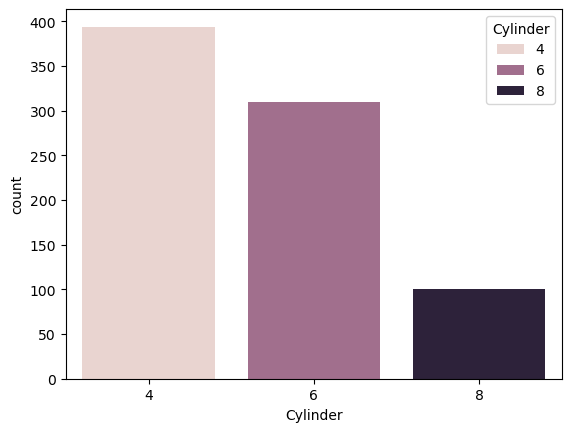

In [25]:
sns.countplot(x = df['Cylinder'] , hue =df['Cylinder'])

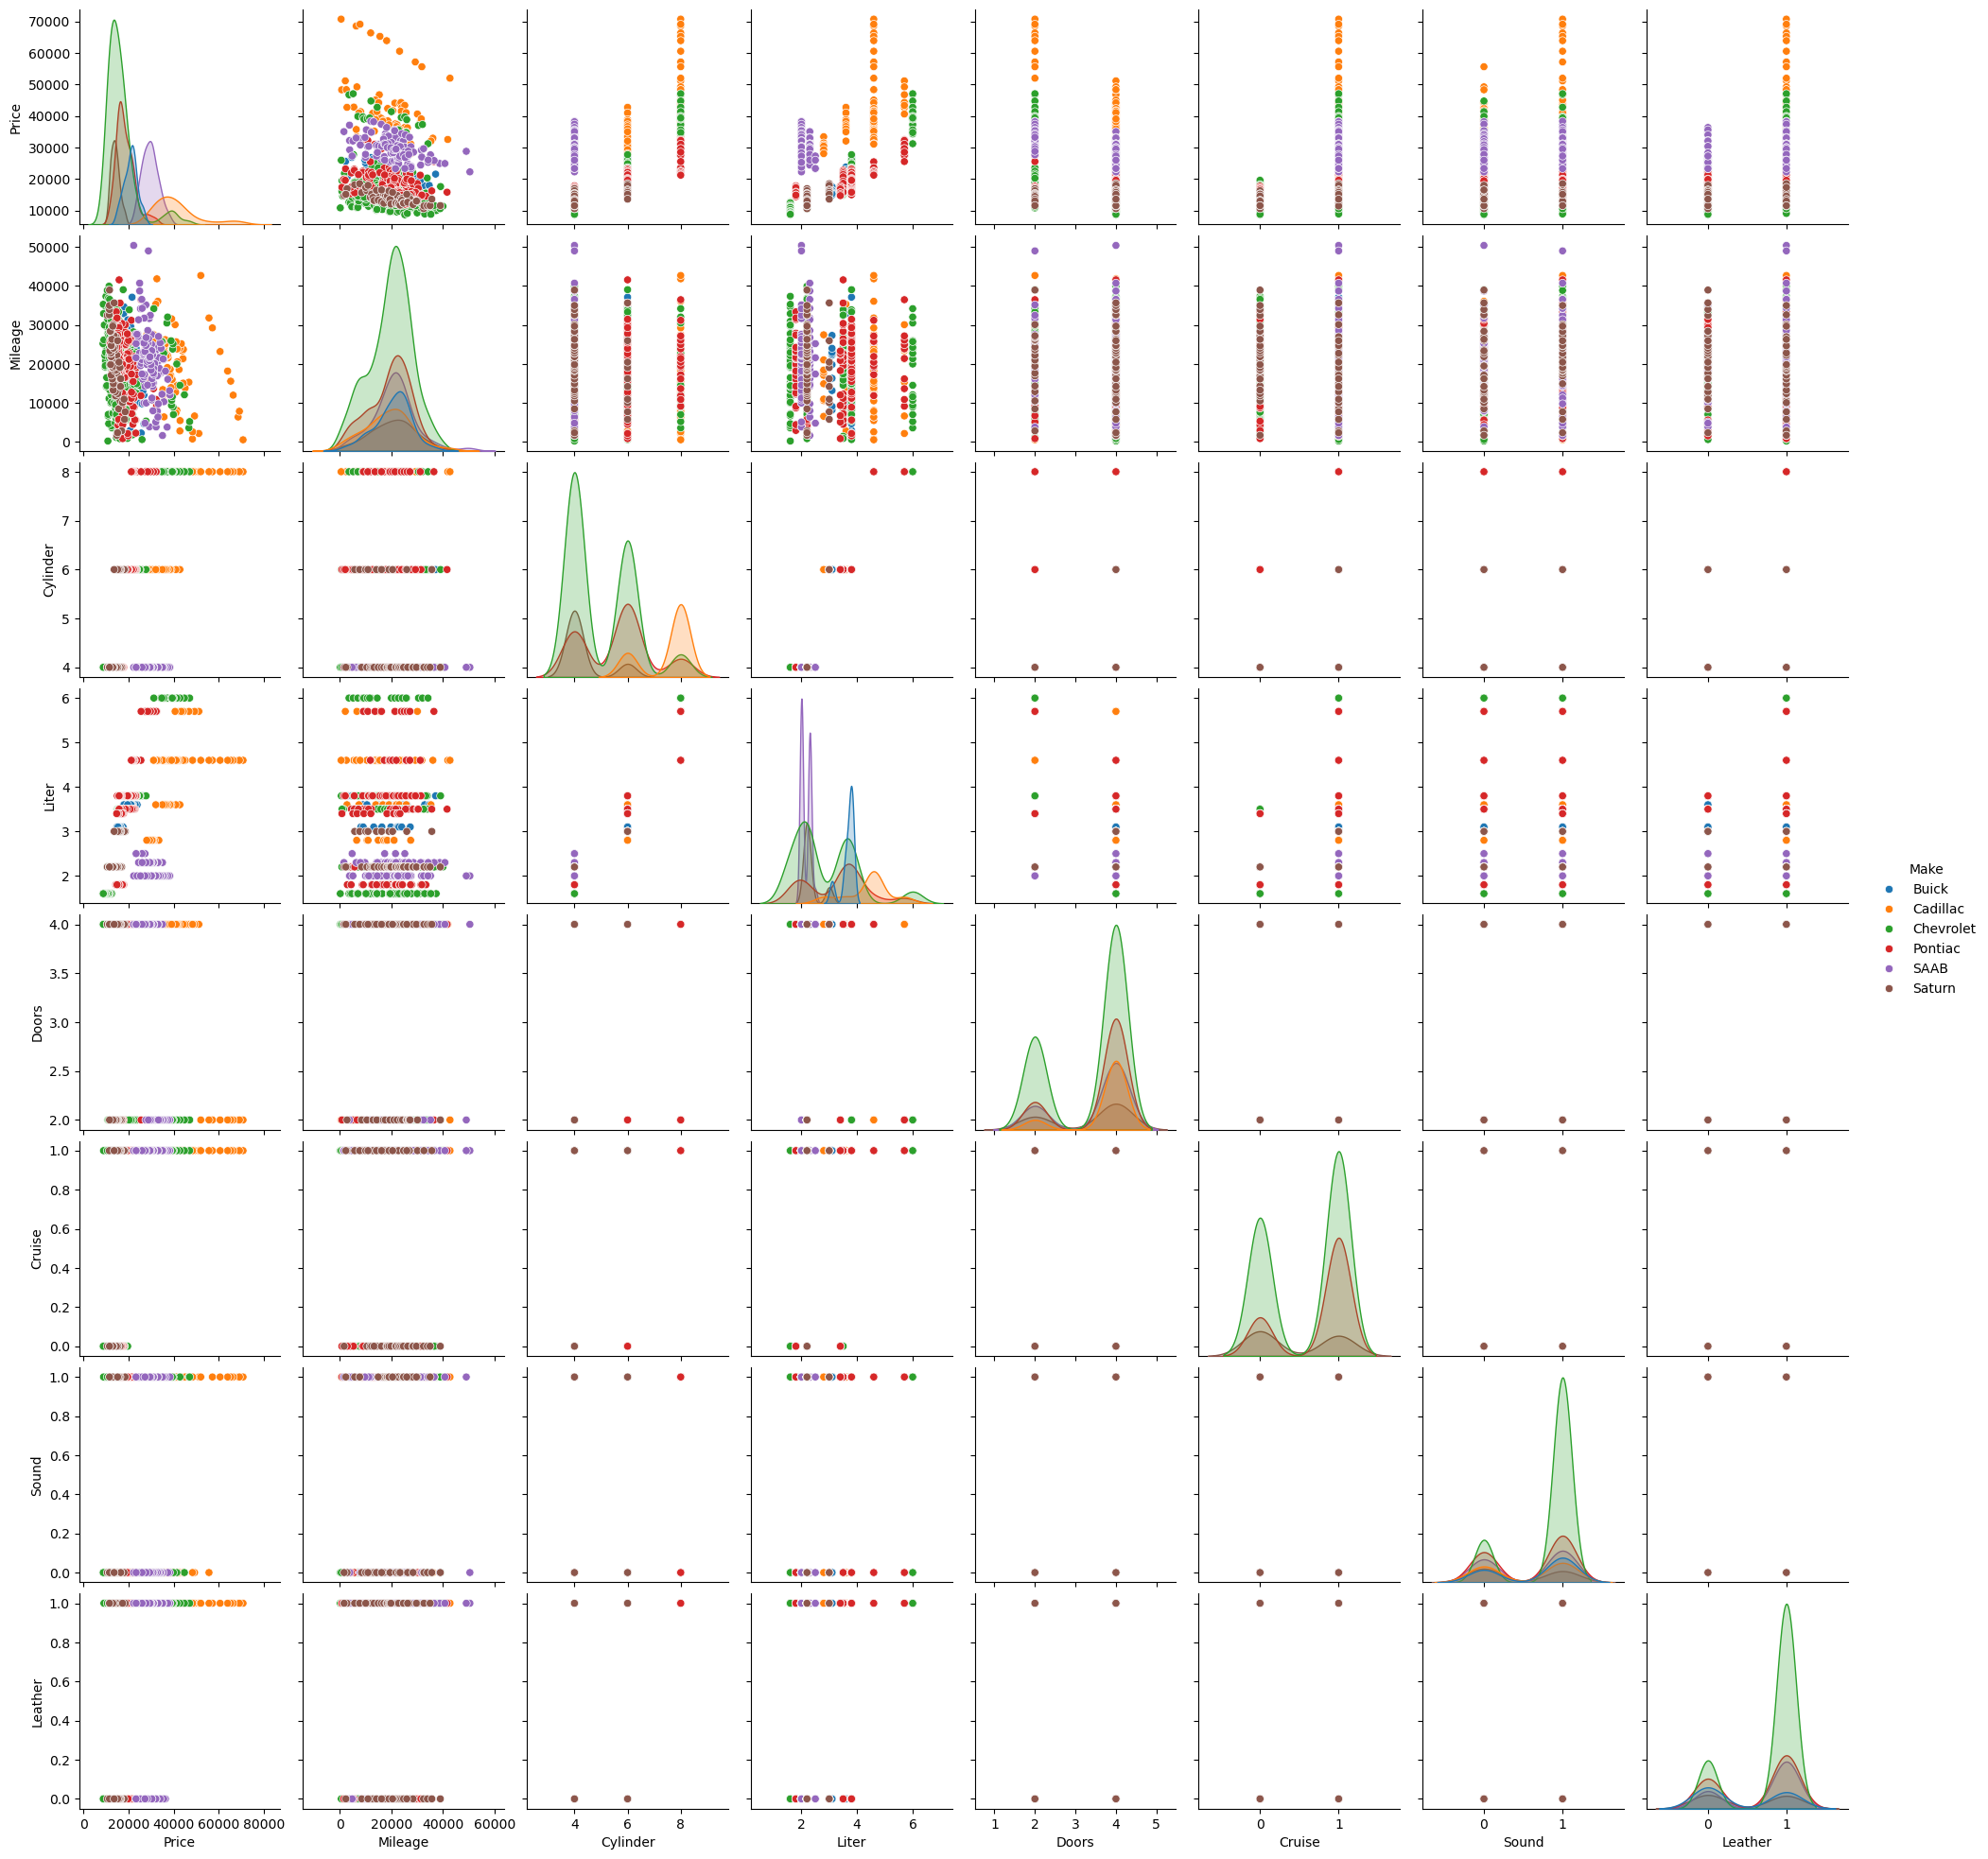

In [26]:
sns.pairplot(df , hue = 'Make') # her sutunun her sutuna göre degisimi

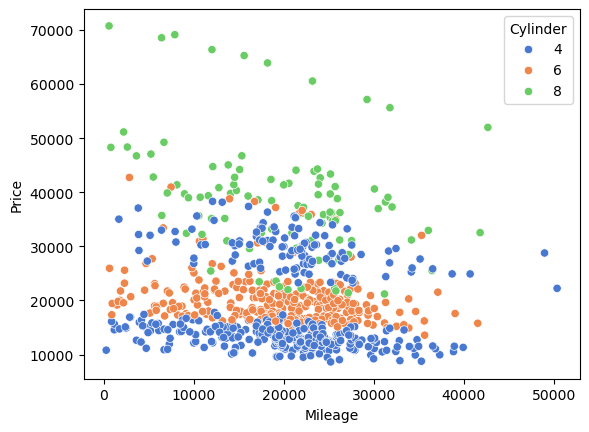

In [27]:
sns.scatterplot(x=df['Mileage'], y=df['Price'] ,hue= df['Cylinder'], palette = 'muted');

## P-value Hesaplama

In [28]:
# H0 = Arabanın üzerindeki km ile fiyati arasinda bir bag yok
# Ha = Arabanın üzerindeki km ile fiyati arasinda bir bag var
# P degerini hesapla eger p < 0.05 kucuk ise sifir hipotezini reddet alternatifini kabul et
# Eger p>0.05 sifir hipotezini kabul et

In [29]:
from scipy.stats import ttest_ind

In [30]:
_,p=ttest_ind(df['Price'], df['Mileage']) # p degerini hesapladik

In [31]:
p

np.float64(0.0008662338227446262)

In [32]:
p < 0.05

np.True_

In [33]:
# Km ile fiyat arasinda bir bag var, arasindaki korelasyom tesadud olarak aciklanamaz

<Axes: xlabel='Price', ylabel='Density'>

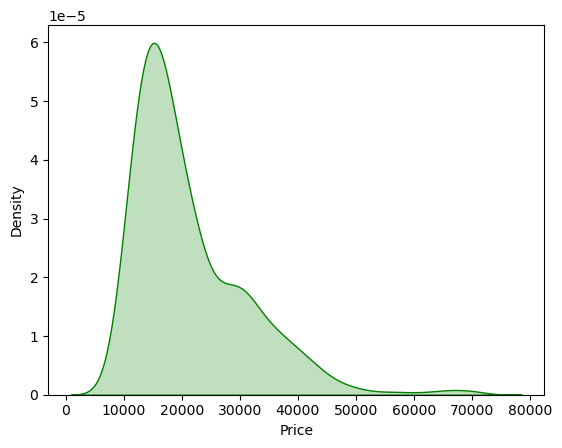

In [34]:
sns.kdeplot(x = df['Price'], fill = True , color = 'green' )

In [35]:
# Box Plot outlier gösterir

<Axes: >

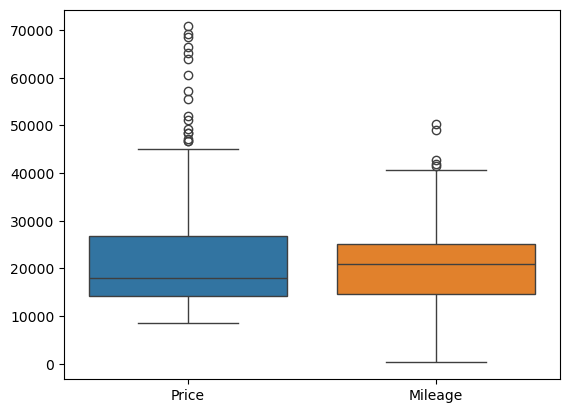

In [36]:
sns.boxplot([df['Price'], df['Mileage']])

<Axes: xlabel='Make', ylabel='Price'>

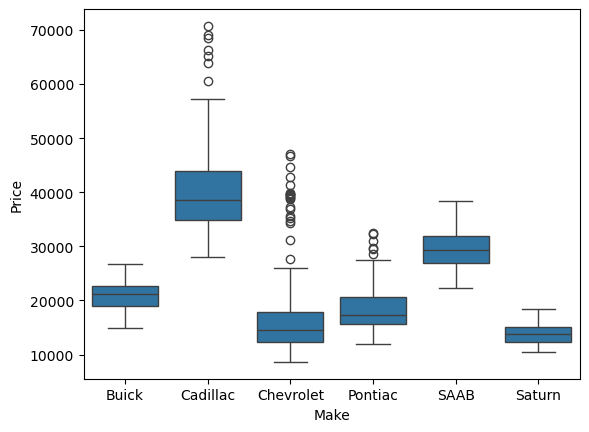

In [37]:
sns.boxplot(x = df['Make'],y= df['Price'])

C:\Users\USER\AppData\Local\Temp\ipykernel_20852\1673281095.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'Make', y = 'Price' , data = df , palette = 'magma' )


<Axes: xlabel='Make', ylabel='Price'>

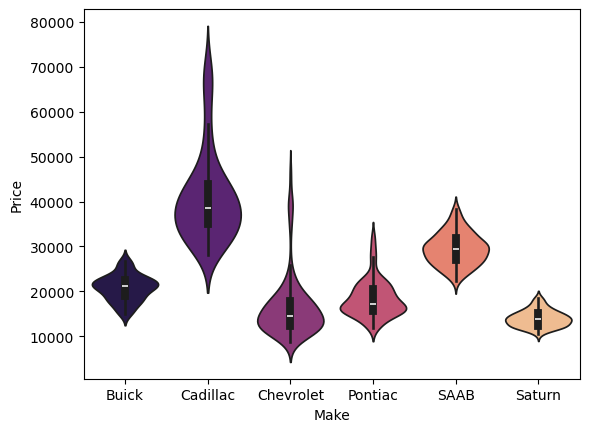

In [38]:
sns.violinplot(x = 'Make', y = 'Price' , data = df , palette = 'magma' )

In [39]:
import plotly.express as px

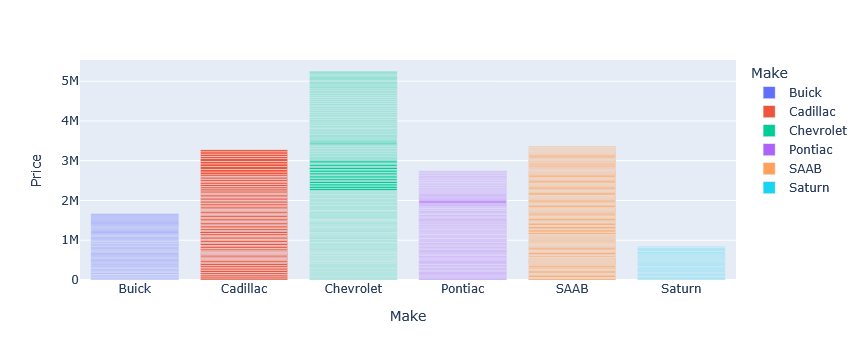

In [40]:
px.bar (df , x ='Make', y ='Price' , color = 'Make' )

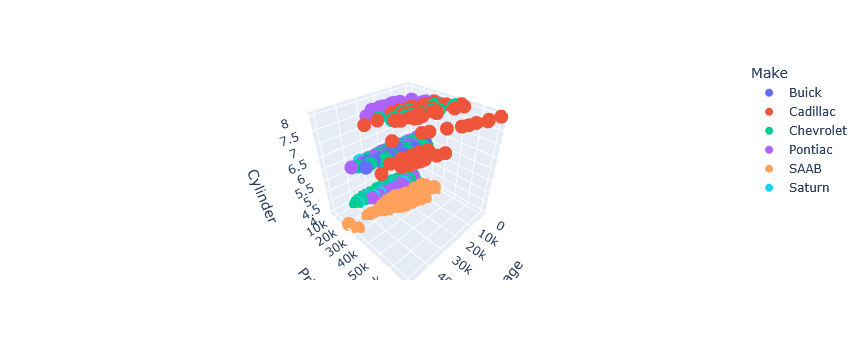

In [41]:
px.scatter_3d(df , x ='Mileage', y ='Price' , color = 'Make' , z = 'Cylinder' )

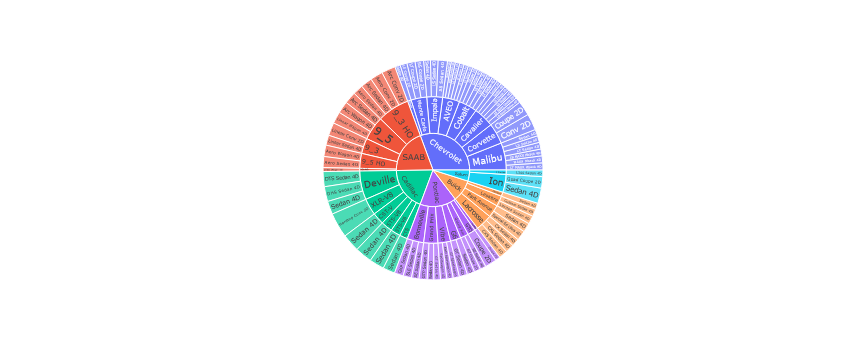

In [42]:
px.sunburst(df , path =['Make' , 'Model' , 'Trim'], values = 'Price' )

## Feature Engineering

In [43]:
df.corr(numeric_only= True) 

Price   Mileage  Cylinder     Liter     Doors    Cruise  \
Price     1.000000 -0.143051  0.569086  0.558146 -0.138750  0.430851   
Mileage  -0.143051  1.000000 -0.029461 -0.018641 -0.016944  0.025037   
Cylinder  0.569086 -0.029461  1.000000  0.957897  0.002206  0.354285   
Liter     0.558146 -0.018641  0.957897  1.000000 -0.079259  0.377509   
Doors    -0.138750 -0.016944  0.002206 -0.079259  1.000000 -0.047674   
Cruise    0.430851  0.025037  0.354285  0.377509 -0.047674  1.000000   
Sound    -0.124348 -0.026146 -0.089704 -0.065527 -0.062530 -0.091730   
Leather   0.157197  0.001005  0.075520  0.087332 -0.061969 -0.070573   

             Sound   Leather  
Price    -0.124348  0.157197  
Mileage  -0.026146  0.001005  
Cylinder -0.089704  0.075520  
Liter    -0.065527  0.087332  
Doors    -0.062530 -0.061969  
Cruise   -0.091730 -0.070573  
Sound     1.000000  0.165444  
Leather   0.165444  1.000000

In [44]:
# Golden rule // %20 nin üstü ve %90 nın altı
# model eğitilirken korelasyonda yüzde 20 ve yüzde 90 arasındaki veriler alınır
# İstenen doğruluk oranına erişemezsek yeni sutunlar eklenerek eğitime devam edilir.

In [45]:
abs(df.corr(numeric_only= True)['Price'].sort_values(ascending = False)) 
# ascending = False büyükten küçüğe sıralamak için , True derse küçükten büyüğe sıralar

Price       1.000000
Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Leather     0.157197
Sound       0.124348
Doors       0.138750
Mileage     0.143051
Name: Price, dtype: float64

In [50]:
x= df[['Mileage','Cylinder','Liter','Cruise']]

In [49]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [51]:
y = df[['Price']]

In [54]:
from sklearn.model_selection import train_test_split # Test ve eğitim verisi oluşturmak için datayı 2 ye böler

In [56]:
x_train , x_test, y_train , y_test = train_test_split(x , y , test_size= 0.20, random_state = 42)

In [57]:
from sklearn.linear_model import LinearRegression # Linear Regression makine öğrenmesi modeli

In [58]:
Lr = LinearRegression()

In [62]:
model = Lr.fit(x_train , y_train) # model eğitildi

In [63]:
_predict = model.predict(x_test) # tahminler degiskene atandi

In [64]:
_predict

array([[13513.93463699],
       [17995.62957671],
       [11338.59911746],
       [27038.06391337],
       [25524.10607907],
       [10129.67870162],
       [16908.20754353],
       [11920.37021182],
       [16741.59609947],
       [19485.19693216],
       [24835.23419991],
       [18618.92882257],
       [17972.74064058],
       [26131.39673309],
       [18859.48596532],
       [25364.50207382],
       [19348.49917916],
       [32066.68199055],
       [18099.69937449],
       [22064.23026295],
       [23009.2491516 ],
       [24743.33245833],
       [23830.86775137],
       [11977.72477584],
       [23784.83497172],
       [26060.91838977],
       [27760.69106472],
       [23486.35908373],
       [12144.58230566],
       [24404.06595777],
       [17791.84033157],
       [21219.62519046],
       [19937.67983966],
       [20504.70733911],
       [26926.40413397],
       [26091.97102874],
       [11304.74321564],
       [25639.7158454 ],
       [25348.31130265],
       [12617.74225088],


In [66]:
from sklearn.metrics import r2_score , mean_squared_error

In [70]:
mean_squared_error(y_test,_predict)** 0.5 # araba başına ortalama hata

7413.255792158802

In [71]:
r2_score(y_test,_predict) # basari oranı 0-1 arası eger negatif cikarsa cook buyuk bir hata var demektir.

0.30711149069980004

In [72]:
x= df[['Mileage','Cylinder','Liter','Cruise','Make','Trim']]
y = df['Price']

In [73]:
x.head(2)

Mileage  Cylinder  Liter  Cruise   Make      Trim
0     8221         6    3.1       1  Buick  Sedan 4D
1     9135         6    3.1       1  Buick  Sedan 4D

In [75]:
x = pd.get_dummies(x,drop_first=True)

In [76]:
x.head()

Mileage  Cylinder  Liter  Cruise  Make_Cadillac  Make_Chevrolet  \
0     8221         6    3.1       1          False           False   
1     9135         6    3.1       1          False           False   
2    13196         6    3.1       1          False           False   
3    16342         6    3.1       1          False           False   
4    19832         6    3.1       1          False           False   

   Make_Pontiac  Make_SAAB  Make_Saturn  Trim_Aero Conv 2D  ...  \
0         False      False        False              False  ...   
1         False      False        False              False  ...   
2         False      False        False              False  ...   
3         False      False        False              False  ...   
4         False      False        False              False  ...   

   Trim_Quad Coupe 2D  Trim_SE Sedan 4D  Trim_SLE Sedan 4D  Trim_SS Coupe 2D  \
0               False             False              False             False   
1               False             False              False             False   
2               False             False              False             False   
3               False             False              False             False   
4               False             False              False             False   

   Trim_SS Sedan 4D  Trim_SVM Hatchback 4D  Trim_SVM Sedan 4D  Trim_Sedan 4D  \
0             False                  False              False           True   
1             False                  False              False           True   
2             False                  False              False           True   
3             False                  False              False           True   
4             False                  False              False           True   

   Trim_Special Ed Ultra 4D  Trim_Sportwagon 4D  
0                     False               False  
1                     False               False  
2                     False               False  
3                     False               False  
4                     False               False  

[5 rows x 55 columns]

In [77]:
x_train , x_test, y_train , y_test = train_test_split(x , y , test_size= 0.20, random_state = 42)

In [78]:
model = Lr.fit(x_train , y_train) # model eğitildi

In [79]:
_predict = model.predict(x_test) # tahminler degiskene atandi

In [80]:
mean_squared_error(y_test,_predict)** 0.5 # araba başına ortalama hata

1523.6314728711316

In [81]:
r2_score(y_test,_predict) # basari oranı 0-1 arası eger negatif cikarsa cook buyuk bir hata var demektir.

0.9707311770106378

In [82]:
# Arabının markasını model eiğitimine dahil ettik